The value of y'(0) is 1.8977269426233436


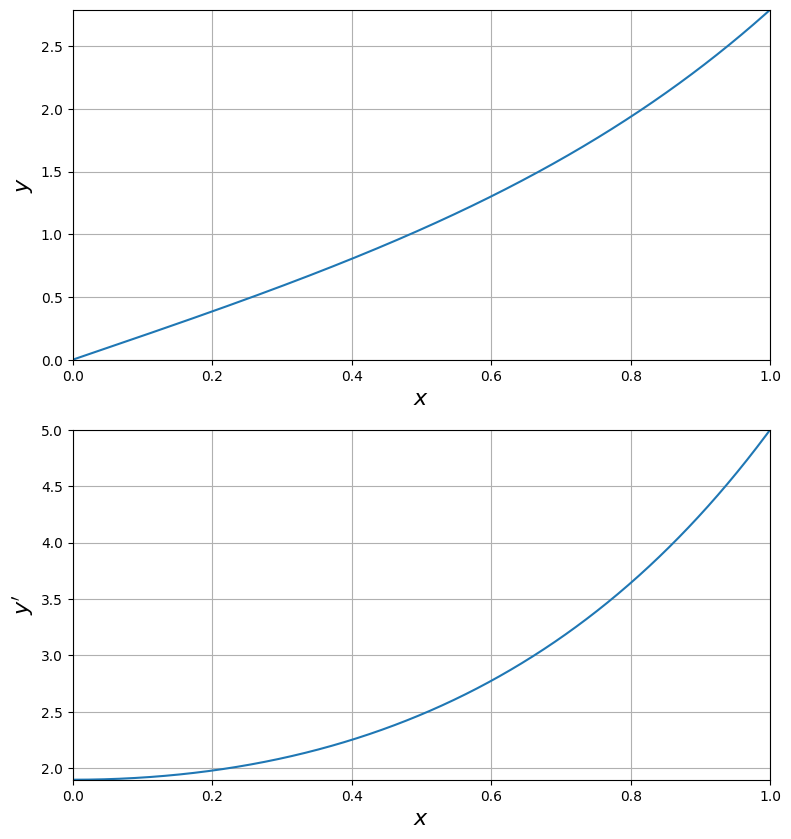

In [1]:
# Exercise 7.1
# Author: Felix Cahyadi
# Date: 30.10.2023

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Define a function that gives the derivative
def derivative(x, y):
    ddy = (2+x)*y
    return ddy

# Define the function that calculates y'(1) given y'(0)
def trajectory(dy0, x, y0, ret_traj = False):
    """This is a function that calculates y'(1) given y'(0)

    Args:
        dy0 (float): The initial velocity
        x (NDarray): The array containing the values of x
        y0 (float): The initial y
        ret_traj (bool, optional): If true, return the trajectories, if false, return dy-5 for optimization by fsolve. Defaults to False.

    Returns:
        y, dy or dy[-1] - 5: Depends of the value of ret_traj, either return trajectory or only return last element of dy minus 5.
    """

    # Calculating h
    h = x[1] - x[0]

    # Calculate the trajectory
    y = np.zeros_like(x)
    y[0] = y0
    dy = np.zeros_like(x)
    dy[0] = dy0

    # Looping for the next y and dy
    for i in range(1,len(y)):
        dy[i] = dy[i-1] + h*derivative(x[i-1],y[i-1])
        y[i] = y[i-1] + h*dy[i-1]


    if ret_traj:
        return y, dy # Return the trajectories
    else:
        return dy[-1] - 5 # Because we want y'(1) = 5

# Define initial conditions
x = np.linspace(0,1,1000)
y0 = 0
dy_guess = 1

# Solve for the correct y'(0)
dy_sol = fsolve(trajectory, dy_guess,(x,y0))
print(f"The value of y'(0) is {dy_sol[0]}")

# Using the acquired y'(0) to get the y and y' trajectories
y_traj, dy_traj = trajectory(dy_sol[0], x, y0, ret_traj=True)

#Plot the result
fig,axs = plt.subplots(nrows=2, ncols=1, figsize = (9,10))
axs[0].plot(x,y_traj)
axs[0].grid(True)
axs[0].set_xlim((x[0],x[-1]))
axs[0].set_ylim((y_traj[0],y_traj[-1]))
axs[0].set_ylabel('$y$', fontsize = 16)
axs[0].set_xlabel('$x$', fontsize = 16)

axs[1].plot(x,dy_traj)
axs[1].grid(True)
axs[1].set_xlim((x[0],x[-1]))
axs[1].set_ylim((dy_traj[0],dy_traj[-1]))
axs[1].set_ylabel("$y'$", fontsize = 16)
axs[1].set_xlabel('$x$', fontsize = 16)

plt.show()


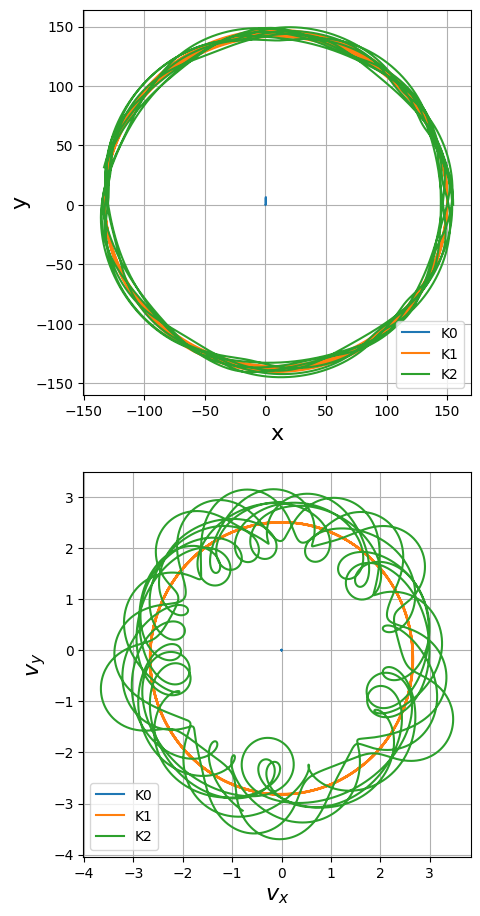

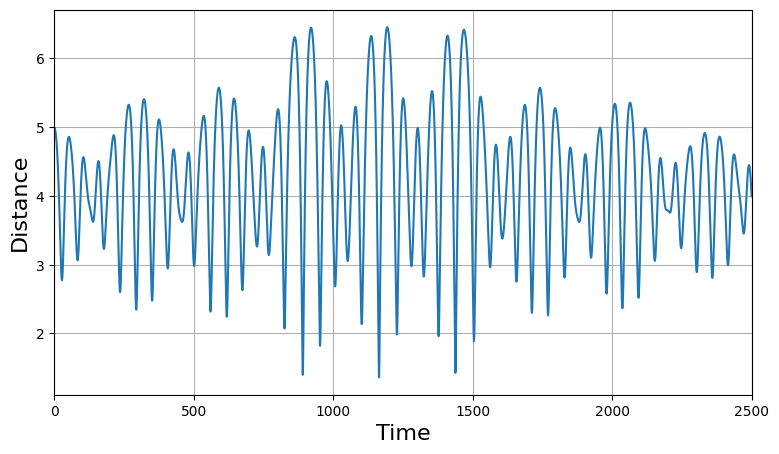

In [2]:
# Exercise 7.2
# Author: Felix Cahyadi
# Date: 30.10.2023

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm

# define the function for acceleration
# We are going to store the position, velocity, and acceleration data in mxn array where m is the number of particles and n is the number of dimension
def accel(x_arr, m_arr, G = 1.0):
    """This is a function that calculates the gravitational acceleration for each particle

    Args:
        x_arr (NDarray): mxn matrix, m is the number of body, and n is the number of dimension
        m_arr (NDarray): array containing the masses of the bodies
        G (float, optional): The gravitational constant. Defaults to 1.0

    Returns:
        acc_arr: An array of mxn size containing acceleration
    """
    
    # define the array for the acceleration
    acc_arr = np.zeros_like(x_arr)

    # calculate the force
    num_particles = len(m_arr) # Get the number of particles involved
    for i in range(num_particles): # This is the particle that receives the gravitational force
        for j in range(num_particles): # This is the particle that "gives" the gravitational force
            if i !=j:
                delta_x = x_arr[i] - x_arr[j] # Position of i w.r.t j
                acc_arr[i] = acc_arr[i] -(G*m_arr[j])*(delta_x/(norm(delta_x,2)**3)) # The gravitational acceleration
    
    return acc_arr

def integrator(func, x_arr0, v_arr0, t_arr, m_arr):
    """This is a function to calculate the trajectory based known force and positions

    Args:
        func (function): Function that describes the acceleration of the bodies
        x_arr0 (NDarray): NumPy array containing the positions of the bodies
        v_arr0 (NDarray): NumPy array containing the velocities of the bodies
        t_arr (NDarray): NumPy array containing the time array
        m_arr (NDarray): array containing the masses of the bodies

    Returns:
        x_arr, v_arr: The positions and velocities of the bodies.
    """
    # Determine the time step
    dt = t_arr[1] - t_arr[0]
    
    # Create array to store x_arr and v_arr
    x_arr = np.zeros(shape = (x_arr0.shape[0], x_arr0.shape[1], len(t_arr)))
    v_arr = np.zeros(shape = (v_arr0.shape[0], v_arr0.shape[1], len(t_arr)))
    x_arr[...,0] = x_arr0 # Putting in the initial values
    v_arr[...,0] = v_arr0 # Same thing for velocity

    for i in range(1,len(t_arr)):
        # This is using verlet velocity integration
        a_now = func(x_arr[...,i-1], m_arr)
        x_arr[...,i] = x_arr[...,i-1] + v_arr[...,i-1]*dt + 0.5*a_now*(dt**2)
        a_next = func(x_arr[...,i], m_arr)
        v_arr[...,i] = v_arr[...,i-1] + ((a_now + a_next)/2)*dt

    return x_arr, v_arr

# initiate the condition
N_steps = 25000 # number of steps
m_arr = np.array([1000.0,1.0,0.01]) # the masses of the bodies
t_arr = np.linspace(0,2500,N_steps) # time array
x_arr0 = np.array([[0,0],[150,0],[155,0]]) # Initial positions of the bodies
v_arr0 = np.array([[0,0],[0,2.5],[0,2.90]]) # Initial velocities of the bodies
labels = ["K0", "K1", "K2"] # labels for the plot
ax_labels = [["x", "y"], ["$v_x$","$v_y$"]] # axis labels for the plot

# Getting the solution
solution = integrator(accel, x_arr0, v_arr0, t_arr, m_arr)

# Visualize the solution
fig, ax = plt.subplots(nrows=2, ncols=1, figsize = (5,11))

for i, traj_all in enumerate(solution):
    for j, traj in enumerate(traj_all):
        ax[i].plot(traj[0,:], traj[1,:], label = labels[j])
    ax[i].grid(True)
    ax[i].legend()
    ax[i].set_xlabel(ax_labels[i][0], fontsize = 16)
    ax[i].set_ylabel(ax_labels[i][1], fontsize = 16)

# Visualize the distance between bodies K1 and K2
# Get positions from the solution
pos = solution[0]

# Get K1 and K2 positions
K1_pos = pos[1]
K2_pos = pos[2]
# Get K1 position relative to K2
rel_pos = K1_pos - K2_pos
# Get the distances over time
dist_over_time = norm(rel_pos, ord = 2, axis=0)


fig2, ax2 = plt.subplots(figsize = (9,5))
ax2.plot(t_arr, dist_over_time)
ax2.grid(True)
ax2.set_xlim((t_arr[0],t_arr[-1]))
ax2.set_xlabel("Time", fontsize = 16)
ax2.set_ylabel("Distance", fontsize = 16)
plt.show()



C:\Users\cahya\AppData\Local\Temp\ipykernel_15876\2915785033.py:60: ComplexWarning: Casting complex values to real discards the imaginary part
  ax.set_xlim((int(k_arr[0]),int(k_arr[-1])))


Text(0, 0.5, '$|c_k|$')

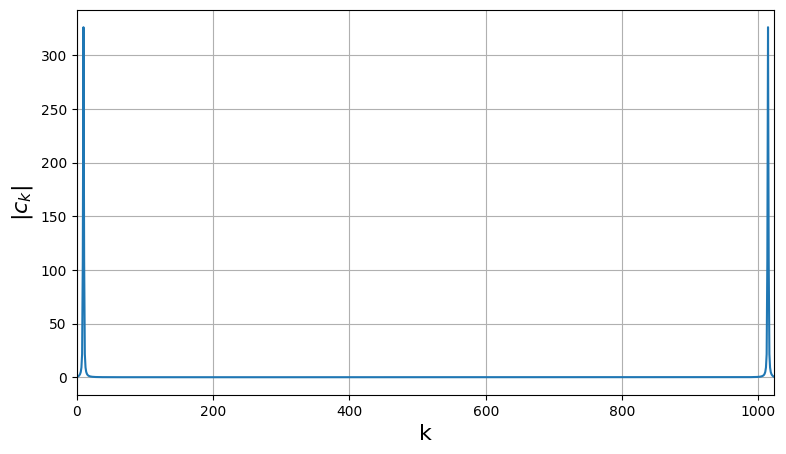

In [3]:
# Exercise 7.3
# Author: Felix Cahyadi
# Date: 30.10.2023

# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate y_n
def yn(n_arr):
    """ This is the function that calculates the value of y_n

    Args:
        n_arr (NDarray): array containing values of n

    Returns:
        y: array containing the values of y
    """
    N = len(n_arr)
    y = np.sin((np.pi*n_arr)/N)*np.sin((20*np.pi*n_arr)/N)

    return y

# Function to calculate Fourier transform
def fourier_transform(y, n_arr, k_arr):
    """ This is a function that calculates the Fourier transform of a function

    Args:
        y (NDarray): array containing the values of y
        n_arr (NDarray): array containing the values of n
        k_arr (NDarray): array containing the values of k

    Returns:
        ck: The coefficients from Fourier transform
    """

    N = len(n_arr)
    
    ck = 0j*np.zeros_like(k_arr, dtype=np.complex64)
    for i in range(len(ck)):
        for j in range(len(n_arr)):
            ck[i] += y[j]*np.exp(-1j*(2*np.pi*k_arr[i]*n_arr[j])/N)

    return ck


# initiate n and k array
n_arr = np.arange(0,1024,1, dtype=np.complex64)
k_arr = np.arange(0,1024,1, dtype=np.complex64)

# Get y
y = yn(n_arr)

# Do the Fourier transform to get the coefficients
c_ft = fourier_transform(y, n_arr, k_arr)

# Visualize the Fourier transform
fig, ax = plt.subplots(figsize = (9,5))
ax.plot(np.abs(k_arr), np.abs(c_ft))
ax.set_xlim((int(k_arr[0]),int(k_arr[-1])))
ax.grid(True)
ax.set_xlabel("k", fontsize = 16)
ax.set_ylabel("$|c_k|$", fontsize = 16)


The acquired energy is 134.43335964375257 eV
$\int |\psi|^2 dx$ =  0.9999661636847408


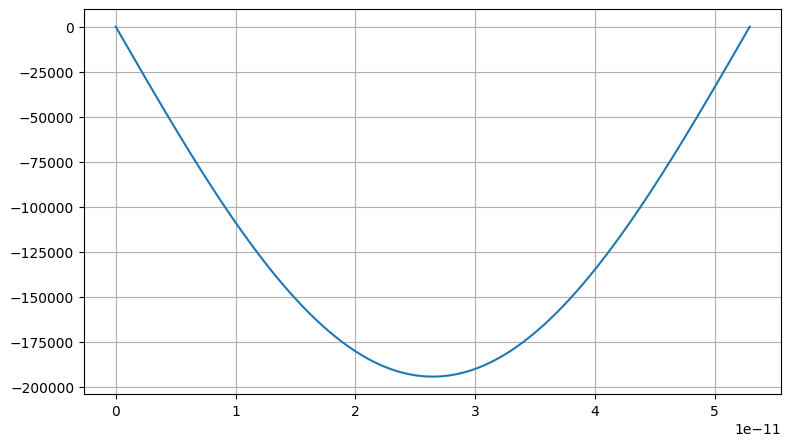

In [16]:
# Exercise 7.4
# Author: Felix Cahyadi
# Date: 30.10.2023

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, simpson
from scipy.optimize import fsolve

# Define the function that returns the derivatives
def wave_eq(t, states, E, m = 9.1e-31, hbar = 6.626e-34/(2*np.pi)):
    """ This is a function that calculates the value of the derivatives

    Args:
        t (float): time
        states (NDarray): array containing psi and phi
        E (float): The energy of the particle
        m (float, optional): Electron's mass. Defaults to 9.1e-31.
        hbar (float, optional): reduced planck's constant. Defaults to 6.626e-34/(2*np.pi).

    Returns:
        NDarray: The derivative of phi and psi
    """
    psi = states[1]
    phi = states[0]
    dpsi = phi
    dphi = ((2*m)/(hbar**2))*(-E)*psi

    return np.array([dphi,dpsi])

# Solve the states using rk4 algorithm, turn it into shooting method
def Energy_fit(E, initial_states, L, ret_sol = False):
    """ This is a function that calculates the wave function of the particle, or \psi(L) depending on the value of ret_sol

    Args:
        E (float): The energy of the system
        initial_states (NDarray): The initial state of psi and phi
        L (float): The length of the potential well
        ret_sol (bool, optional): If True, return the trajectory, if False, return only the potential. Defaults to False.

    Returns:
        solution: Will be an array containing the trajectory if ret_sol = True, will be \psi(L) if ret_sol = False.
    """
    sol = solve_ivp(wave_eq, (0, L), initial_states, method= 'RK45', args=([E]), max_step = 2e-14, vectorized= True)

    if ret_sol:
        return sol
    else:
        return sol.y[0][-1]

# Setting some initial values
L = 5.29177e-11
state0 = np.array([0.0,3.2746e-6]) # This value is acquired from the integration of the wave function below
guess_E = 100*1.602e-19


sol_E = fsolve(Energy_fit, guess_E, args = (state0, L))
print(f"The acquired energy is {sol_E[0]/1.602e-19} eV")

sol_traj = Energy_fit(sol_E, state0, L, ret_sol=True)

psi = sol_traj.y[0]
x = sol_traj.t

# Integrate the wave function
int_wave = simpson(np.square(psi), x)
print("$\int |\psi|^2 dx$ = ", int_wave)

# Visualization
fig, ax = plt.subplots(figsize = (9,5))
ax.plot(x, psi)
ax.grid(True)